<a href="https://colab.research.google.com/github/ardra1111/Wheel-Wise/blob/main/Wheel_Wise_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ardraajay","key":"4f904d5a4b25b9f86a905466fa4d77b7"}'}

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
%cd /content/kaggle.json

[Errno 20] Not a directory: '/content/kaggle.json'
/content


In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!cp /content/kaggle.json ~/.kaggle

In [9]:
!chmod 600 /content/kaggle.json

In [10]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip /content/craigslist-carstrucks-data.zip

Archive:  /content/craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#**UNDERSTANDING THE DATA**

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("/content/vehicles.csv")

In [14]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [15]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [16]:
data.shape

(426880, 26)

# **DATA CLEANING**

**Removing Unwanted Columns That Does Not Affect The Price**

In [17]:
data.drop(labels= data.columns[0:4], axis=1,inplace=True)

In [18]:
data.drop(labels= data.columns[15:], axis=1,inplace=True)

In [19]:
data.drop(labels=["title_status","VIN"], axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [21]:
data.shape

(426880, 13)

**Checking How Many Missing Values**

In [22]:
data.isna()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,False,True,True,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,False,False,False,True,False,True
426876,False,False,False,False,False,True,False,False,False,False,True,False,False
426877,False,False,False,False,False,True,False,False,False,True,True,False,False
426878,False,False,False,False,False,False,False,False,False,False,True,False,False


In [23]:
data.isna().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [24]:
data.dropna(axis=0,thresh=12,inplace=True) # axis 0 means row, thresh 12 means row with atleast 12 missing values.
#so this means remove rows which has 12 missing values

In [25]:
'''
#Performing label ecoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'data'

# Identify non-numeric columns
non_numeric_columns = [column for column in data.columns if data[column].dtype == "object"]

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each non-numeric column
for column in non_numeric_columns:
    data[column] = le.fit_transform(data[column])

# Print the transformed DataFrame
print(data)
'''

'\n#Performing label ecoding\nimport pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\n\n# Assuming your DataFrame is named \'data\'\n\n# Identify non-numeric columns\nnon_numeric_columns = [column for column in data.columns if data[column].dtype == "object"]\n\n# Create a LabelEncoder object\nle = LabelEncoder()\n\n# Apply label encoding to each non-numeric column\nfor column in non_numeric_columns:\n    data[column] = le.fit_transform(data[column])\n\n# Print the transformed DataFrame\nprint(data)\n'

In [26]:
'''
import pandas as pd

# Assuming your encoded DataFrame is still named 'data'

# Select the 'model' column and all other numeric columns
correlation_data = data[['model'] + data.select_dtypes(include=['number']).columns.tolist()]

# Calculate Pearson correlation
correlation = correlation_data.corr(method='pearson')

# Print the correlation matrix
print(correlation)
'''

"\nimport pandas as pd\n\n# Assuming your encoded DataFrame is still named 'data'\n\n# Select the 'model' column and all other numeric columns\ncorrelation_data = data[['model'] + data.select_dtypes(include=['number']).columns.tolist()]\n\n# Calculate Pearson correlation\ncorrelation = correlation_data.corr(method='pearson')\n\n# Print the correlation matrix\nprint(correlation)\n"

**FILLING MISSING VALUES**

In [27]:
data.isna().sum()

price               0
year                0
manufacturer     4059
model             975
condition       13570
cylinders        1766
fuel                0
odometer          408
transmission       11
drive            2491
size            36793
type             1893
paint_color      2856
dtype: int64

In [28]:
data["manufacturer"].value_counts()

ford               24663
chevrolet          21040
toyota             12227
honda               8115
nissan              7261
jeep                6783
gmc                 5635
ram                 5199
dodge               4886
bmw                 4699
mercedes-benz       4443
hyundai             3202
subaru              3136
lexus               2874
volkswagen          2750
kia                 2429
chrysler            2293
cadillac            2065
buick               1810
infiniti            1673
audi                1633
mazda               1597
acura               1494
lincoln             1410
pontiac             1014
mitsubishi           982
volvo                947
mini                 715
rover                593
mercury              583
saturn               459
jaguar               450
porsche              432
fiat                 203
alfa-romeo            88
tesla                 61
harley-davidson       49
ferrari               28
datsun                24
land rover             8


In [29]:
data["manufacturer"].fillna(value='ford',inplace=True)

In [30]:
data.isna().sum()

price               0
year                0
manufacturer        0
model             975
condition       13570
cylinders        1766
fuel                0
odometer          408
transmission       11
drive            2491
size            36793
type             1893
paint_color      2856
dtype: int64

In [31]:
data["odometer"].fillna(value=data["odometer"].mean(),inplace=True) #filling all the missing values in odometer with mean

In [32]:
data["condition"].unique()

array(['excellent', 'good', 'like new', 'new', 'fair', nan, 'salvage'],
      dtype=object)

In [33]:
data["condition"].value_counts()

excellent    59097
good         51580
like new     14128
fair          4547
new            732
salvage        363
Name: condition, dtype: int64

In [34]:
data["condition"].value_counts().index

Index(['excellent', 'good', 'like new', 'fair', 'new', 'salvage'], dtype='object')

In [35]:
data["condition"].fillna(value=data["condition"].value_counts().index[data["condition"].value_counts().argmax()],inplace=True)
data["paint_color"].fillna(value=data["paint_color"].value_counts().index[data["paint_color"].value_counts().argmax()],inplace=True)
data["transmission"].fillna(value=data["transmission"].value_counts().index[data["transmission"].value_counts().argmax()],inplace=True)

in data's condition argument fill the na (blanks) with the most frequent occuring condition's index using argmax it will ensure that the me arg max means the argument that is repeating the most.

In [36]:
data.isna().sum()

price               0
year                0
manufacturer        0
model             975
condition           0
cylinders        1766
fuel                0
odometer            0
transmission        0
drive            2491
size            36793
type             1893
paint_color         0
dtype: int64

**Creating A Cross Tabulation Table For Filling Models**



For filling up the missiing values in model
it creates a table with coloumn as the model name and the rows as the year intersection manufacturer.
which means the each row contain the number of cars that is in a perticular year and under the perticular manufacturer that comes under the column model

In [37]:
import numpy as np

In [38]:
year = np.array(data["year"])
manufacturer = np.array(data['manufacturer'])
model = np.array(data['model'])

In [39]:
crosstab_df = pd.crosstab([manufacturer,year],model,rownames=["manufacturer","year"], colnames=['model'])

In [40]:
crosstab_df

model                "t"  %  & altima  '99 H1 Hummer  (210)  (300)  \
manufacturer year                                                    
acura        1900.0    0  0         0              0      0      0   
             1991.0    0  0         0              0      0      0   
             1992.0    0  0         0              0      0      0   
             1993.0    0  0         0              0      0      0   
             1994.0    0  0         0              0      0      0   
...                  ... ..       ...            ...    ...    ...   
volvo        1966.0    0  0         0              0      0      0   
             1967.0    0  0         0              0      0      0   
             1970.0    0  0         0              0      0      0   
             1971.0    0  0         0              0      0      0   
             1972.0    0  0         0              0      0      0   

model                (cng) 2500 express van  (s)port (s)edan  * vmi * ♿  -  \
manufacturer year                                                            
acura        1900.0                       0                0          0  0   
             1991.0                       0                0          0  0   
             1992.0                       0                0          0  0   
             1993.0                       0                0          0  0   
             1994.0                       0                0          0  0   
...                                     ...              ...        ... ..   
volvo        1966.0                       0                0          0  0   
             1967.0                       0                0          0  0   
             1970.0                       0                0          0  0   
             1971.0                       0                0          0  0   
             1972.0                       0                0          0  0   

model                ...  z4 sdrive35i  z4 sdrive35is  z71  zdx  zephyr  \
manufacturer year    ...                                                  
acura        1900.0  ...             0              0    0    0       0   
             1991.0  ...             0              0    0    0       0   
             1992.0  ...             0              0    0    0       0   
             1993.0  ...             0              0    0    0       0   
             1994.0  ...             0              0    0    0       0   
...                  ...           ...            ...  ...  ...     ...   
volvo        1966.0  ...             0              0    0    0       0   
             1967.0  ...             0              0    0    0       0   
             1970.0  ...             0              0    0    0       0   
             1971.0  ...             0              0    0    0       0   
             1972.0  ...             0              0    0    0       0   

model                zl1 camaro  zr2 sonoma  zx2  ♿  ♿ vmi  
manufacturer year                                           
acura        1900.0           0           0    0  0      0  
             1991.0           0           0    0  0      0  
             1992.0           0           0    0  0      0  
             1993.0           0           0    0  0      0  
             1994.0           0           0    0  0      0  
...                         ...         ...  ... ..    ...  
volvo        1966.0           0           0    0  0      0  
             1967.0           0           0    0  0      0  
             1970.0           0           0    0  0      0  
             1971.0           0           0    0  0      0  
             1972.0           0           0    0  0      0  

[1708 rows x 14487 columns]

In [41]:
data['manufacturer'].unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'infiniti', 'acura',
       'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'rover',
       'ferrari', 'audi', 'mitsubishi', 'kia', 'pontiac', 'hyundai',
       'fiat', 'cadillac', 'lincoln', 'jaguar', 'saturn', 'volvo',
       'alfa-romeo', 'buick', 'subaru', 'mini', 'mercury', 'tesla',
       'harley-davidson', 'datsun', 'land rover', 'aston-martin'],
      dtype=object)

In [42]:
mapping_dict = dict()

for single_col in crosstab_df:
  mapping_dict[single_col] = crosstab_df[single_col].index[crosstab_df[single_col].argmax()]

In [43]:
mapping_dict

{'"t"': ('ford', 1913.0),
 '%': ('ford', 2002.0),
 '& altima': ('chevrolet', 2006.0),
 "'99 H1 Hummer": ('ford', 1999.0),
 '(210)': ('chevrolet', 1955.0),
 '(300)': ('chrysler', 2006.0),
 '(cng) 2500 express van': ('chevrolet', 2012.0),
 '(s)port (s)edan': ('chevrolet', 1996.0),
 '* vmi * ♿': ('chrysler', 2006.0),
 '-': ('ford', 2004.0),
 '- 1500': ('ford', 2016.0),
 '- 240d': ('mercedes-benz', 1974.0),
 '- 328i - convertible': ('bmw', 1997.0),
 '- benz sprinter': ('mercedes-benz', 2019.0),
 '- isuzu npr landscape truck': ('ford', 2001.0),
 '- santa fe': ('hyundai', 2011.0),
 '-150 xlt': ('ford', 2014.0),
 '-benz e350': ('mercedes-benz', 2010.0),
 '-benz s430': ('mercedes-benz', 2004.0),
 '.Cadillac XLR convertible': ('ford', 2004.0),
 '/ accord': ('honda', 2013.0),
 '/ bertone x1/9': ('fiat', 1983.0),
 '/ braun': ('dodge', 2003.0),
 '/ durango sport': ('dodge', 2015.0),
 '/ vmi / ♿': ('chrysler', 2006.0),
 '// vmi // ♿': ('chrysler', 2006.0),
 '// vmi ♿': ('chrysler', 2006.0),
 '/merc

In [44]:
for k,v in mapping_dict.items():
  boolean_mask = (data["year"] == v[1]) & (data["manufacturer"] == v[0])
  data.loc[boolean_mask,"model"] = data.loc[boolean_mask,"model"].fillna(value=k,inplace=False)

In [45]:
data.isna().sum()

price               0
year                0
manufacturer        0
model              94
condition           0
cylinders        1766
fuel                0
odometer            0
transmission        0
drive            2491
size            36793
type             1893
paint_color         0
dtype: int64

In [46]:
data["model"].value_counts()

f-150                      2725
silverado 1500             2344
1500                       1208
camry                      1208
accord                     1160
                           ... 
2008 GL 450 4matic            1
2006 f350                     1
model x 100d                  1
PETERBILT 389 EXT HOOD        1
Paige Glenbrook Touring       1
Name: model, Length: 14487, dtype: int64

In [47]:
data['model'].fillna(value='f-150', inplace =True)

In [48]:
data.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders        1766
fuel                0
odometer            0
transmission        0
drive            2491
size            36793
type             1893
paint_color         0
dtype: int64

**CREATING A CROSS TAB FOR FILLING CYLINDERS**

For filling up the missiing values in cylinders it creates a table with coloumn as the number of cylinders and the rows as the intersection of model and manufacturer. which means the each block contain the number of cylinders that of  the perticular manufacturer and model.

In [49]:
cylinders = np.array(data["cylinders"])
manufacturer = np.array(data['manufacturer'])
model = np.array(data['model'])

In [50]:
second_crosstab_df = pd.crosstab([manufacturer,model],cylinders,rownames=["manufacturer","model"], colnames=['cylinders'])

In [51]:
second_crosstab_df

cylinders                                10 cylinders  12 cylinders  \
manufacturer model                                                    
acura        2002 rsx type s                        0             0   
             3.0cl                                  0             0   
             3.2 cl type s                          0             0   
             3.2 tl                                 0             0   
             3.2 tl - sport                         0             0   
...                                               ...           ...   
volvo        xc90 t6 awd                            0             0   
             xc90 t8 hybrid inscription             0             0   
             xc90 t8 inscription                    0             0   
             xc90 v8                                0             0   
             xc90 v8 awd                            0             0   

cylinders                                3 cylinders  4 cylinders  \
manufacturer model                                                  
acura        2002 rsx type s                       0            2   
             3.0cl                                 0            0   
             3.2 cl type s                         0            0   
             3.2 tl                                0            0   
             3.2 tl - sport                        0            0   
...                                              ...          ...   
volvo        xc90 t6 awd                           0            1   
             xc90 t8 hybrid inscription            0            0   
             xc90 t8 inscription                   0            0   
             xc90 v8                               0            0   
             xc90 v8 awd                           0            0   

cylinders                                5 cylinders  6 cylinders  \
manufacturer model                                                  
acura        2002 rsx type s                       0            0   
             3.0cl                                 0            3   
             3.2 cl type s                         0            3   
             3.2 tl                                0            8   
             3.2 tl - sport                        0            1   
...                                              ...          ...   
volvo        xc90 t6 awd                           0            2   
             xc90 t8 hybrid inscription            0            6   
             xc90 t8 inscription                   0            1   
             xc90 v8                               0            0   
             xc90 v8 awd                           0            0   

cylinders                                8 cylinders  other  
manufacturer model                                           
acura        2002 rsx type s                       0      0  
             3.0cl                                 0      0  
             3.2 cl type s                         0      0  
             3.2 tl                                0      0  
             3.2 tl - sport                        0      0  
...                                              ...    ...  
volvo        xc90 t6 awd                           0      0  
             xc90 t8 hybrid inscription            0      0  
             xc90 t8 inscription                   0      0  
             xc90 v8                               2      0  
             xc90 v8 awd                           1      0  

[14692 rows x 8 columns]

In [52]:
data['cylinders'].unique()

array(['6 cylinders', '8 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [53]:
second_mapping_dict = dict()
for single_col in second_crosstab_df:
  second_mapping_dict[single_col] = second_crosstab_df[single_col].index[second_crosstab_df[single_col].argmax()]


In [54]:
for k,v in second_mapping_dict.items():
  boolean_mask = (data["model"] == v[1]) & (data["manufacturer"] == v[0])
  data.loc[boolean_mask,"cylinders"] = data.loc[boolean_mask,"cylinders"].fillna(value=k,inplace=False)

In [55]:
print(data.isna().sum())

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders        1505
fuel                0
odometer            0
transmission        0
drive            2491
size            36793
type             1893
paint_color         0
dtype: int64


In [56]:
data['cylinders'].value_counts()

6 cylinders     52139
4 cylinders     45561
8 cylinders     41880
5 cylinders      1088
10 cylinders      965
other             441
3 cylinders       339
12 cylinders       99
Name: cylinders, dtype: int64

In [57]:
data["cylinders"].fillna(value=data["cylinders"].value_counts().index[data["cylinders"].value_counts().argmax()],inplace=True)

In [58]:
data.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
drive            2491
size            36793
type             1893
paint_color         0
dtype: int64

**CREATING A CROSS TAB FOR FILLING DRIVE**

For filling up the missiing values in drive.

it creates a table with coloumn as the type of drive and the rows as the intersection of model and manufacturer.

which means the each block contain the type of drive that of the perticular manufacturer and model.

In [59]:
data['drive'].unique()

array(['rwd', '4wd', 'fwd', nan], dtype=object)

In [60]:
drive = np.array(data["drive"])
manufacturer = np.array(data['manufacturer'])
model = np.array(data['model'])

In [61]:
crosstab_df_dr = pd.crosstab([manufacturer,model],drive,rownames=["manufacturer","model"], colnames=['drive'])

In [62]:
crosstab_df_dr

drive                                    4wd  fwd  rwd
manufacturer model                                    
acura        2002 rsx type s               0    2    0
             3.0cl                         0    2    0
             3.2 cl type s                 0    1    0
             3.2 tl                        0    7    1
             3.2 tl - sport                0    0    1
...                                      ...  ...  ...
volvo        xc90 t6 awd                   3    0    0
             xc90 t8 hybrid inscription    6    0    0
             xc90 t8 inscription           1    0    0
             xc90 v8                       2    0    0
             xc90 v8 awd                   1    0    0

[14617 rows x 3 columns]

In [63]:
drive_mapping_dict = dict()
for single_col in crosstab_df_dr:
  drive_mapping_dict[single_col] = crosstab_df_dr[single_col].index[crosstab_df_dr[single_col].argmax()]


In [64]:
for k,v in drive_mapping_dict.items():
  boolean_mask = (data["model"] == v[1]) & (data["manufacturer"] == v[0])
  data.loc[boolean_mask,"drive"] = data.loc[boolean_mask,"drive"].fillna(value=k,inplace=False)

In [65]:
data.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
drive            2431
size            36793
type             1893
paint_color         0
dtype: int64

In [66]:
data['drive'].value_counts()

4wd    59273
fwd    47824
rwd    34489
Name: drive, dtype: int64

In [67]:
data["drive"].fillna(value=data["drive"].value_counts().index[data["drive"].value_counts().argmax()],inplace=True)

In [68]:
data.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
drive               0
size            36793
type             1893
paint_color         0
dtype: int64

**CREATING A CROSS TAB FOR FILLING SIZE**

For filling up the missiing values in size.

it creates a table with coloumn as the type of sizes and the rows as the intersection of model and manufacturer.

which means the each block contain the type of size that of the perticular manufacturer and model.

In [69]:
data['size'].unique()

array(['full-size', nan, 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [70]:
size = np.array(data["size"])
manufacturer = np.array(data['manufacturer'])
model = np.array(data['model'])

In [71]:
crosstab_df_sz = pd.crosstab([manufacturer,model],size,rownames=["manufacturer","model"], colnames=['size'])

In [72]:
crosstab_df_sz

size                                     compact  full-size  mid-size  \
manufacturer model                                                      
acura        2002 rsx type s                   0          0         0   
             3.0cl                             3          0         0   
             3.2 cl type s                     0          2         1   
             3.2 tl                            0          3         4   
             3.2 tl - sport                    0          1         0   
...                                          ...        ...       ...   
volvo        xc90 t6 awd                       0          1         0   
             xc90 t8 hybrid inscription        0          6         0   
             xc90 t8 inscription               0          0         1   
             xc90 v8                           0          2         0   
             xc90 v8 awd                       0          0         1   

size                                     sub-compact  
manufacturer model                                    
acura        2002 rsx type s                       1  
             3.0cl                                 0  
             3.2 cl type s                         0  
             3.2 tl                                0  
             3.2 tl - sport                        0  
...                                              ...  
volvo        xc90 t6 awd                           0  
             xc90 t8 hybrid inscription            0  
             xc90 t8 inscription                   0  
             xc90 v8                               0  
             xc90 v8 awd                           0  

[12879 rows x 4 columns]

In [73]:
size_mapping_dict = dict()
for single_col in crosstab_df_sz:
  size_mapping_dict[single_col] = crosstab_df_sz[single_col].index[crosstab_df_sz[single_col].argmax()]

In [74]:
for k,v in size_mapping_dict.items():
  boolean_mask = (data["model"] == v[1]) & (data["manufacturer"] == v[0])
  data.loc[boolean_mask,"size"] = data.loc[boolean_mask,"size"].fillna(value=k,inplace=False)

In [75]:
data.isna().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
drive               0
size            35937
type             1893
paint_color         0
dtype: int64

In [76]:
data['size'].value_counts()

full-size      56923
mid-size       33650
compact        15170
sub-compact     2337
Name: size, dtype: int64

In [77]:
data["size"].fillna(value=data["size"].value_counts().index[data["size"].value_counts().argmax()],inplace=True)

In [78]:
data.isna().sum()

price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
drive              0
size               0
type            1893
paint_color        0
dtype: int64

**CREATING A CROSS TAB FOR FILLING TYPE**

For filling up the missiing values in type.

it creates a table with coloumn as the types and the rows as the intersection of model and manufacturer.

which means the each block contain the types car of the perticular manufacturer and model.

In [79]:
data['type'].unique()

array(['truck', 'pickup', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'bus', 'van', 'convertible', 'hatchback', 'wagon', nan],
      dtype=object)

In [80]:
type = np.array(data["type"])
manufacturer = np.array(data['manufacturer'])
model = np.array(data['model'])

In [81]:
crosstab_df_typ = pd.crosstab([manufacturer,model],type,rownames=["manufacturer","model"], colnames=['type'])

In [82]:
crosstab_df_typ

type                                     SUV  bus  convertible  coupe  \
manufacturer model                                                      
acura        2002 rsx type s               0    0            0      2   
             3.0cl                         0    0            0      3   
             3.2 cl type s                 0    0            0      3   
             3.2 tl                        0    0            0      0   
             3.2 tl - sport                0    0            0      0   
...                                      ...  ...          ...    ...   
volvo        xc90 t6 awd                   3    0            0      0   
             xc90 t8 hybrid inscription    0    0            0      0   
             xc90 t8 inscription           1    0            0      0   
             xc90 v8                       2    0            0      0   
             xc90 v8 awd                   1    0            0      0   

type                                     hatchback  mini-van  offroad  other  \
manufacturer model                                                             
acura        2002 rsx type s                     0         0        0      0   
             3.0cl                               0         0        0      0   
             3.2 cl type s                       0         0        0      0   
             3.2 tl                              0         0        0      0   
             3.2 tl - sport                      0         0        0      0   
...                                            ...       ...      ...    ...   
volvo        xc90 t6 awd                         0         0        0      0   
             xc90 t8 hybrid inscription          0         0        0      0   
             xc90 t8 inscription                 0         0        0      0   
             xc90 v8                             0         0        0      0   
             xc90 v8 awd                         0         0        0      0   

type                                     pickup  sedan  truck  van  wagon  
manufacturer model                                                         
acura        2002 rsx type s                  0      0      0    0      0  
             3.0cl                            0      0      0    0      0  
             3.2 cl type s                    0      0      0    0      0  
             3.2 tl                           0      8      0    0      0  
             3.2 tl - sport                   0      1      0    0      0  
...                                         ...    ...    ...  ...    ...  
volvo        xc90 t6 awd                      0      0      0    0      0  
             xc90 t8 hybrid inscription       0      6      0    0      0  
             xc90 t8 inscription              0      0      0    0      0  
             xc90 v8                          0      0      0    0      0  
             xc90 v8 awd                      0      0      0    0      0  

[14678 rows x 13 columns]

In [83]:
type_mapping_dict = dict()
for single_col in crosstab_df_typ:
  type_mapping_dict[single_col] = crosstab_df_typ[single_col].index[crosstab_df_typ[single_col].argmax()]

In [84]:
for k,v in type_mapping_dict.items():
  boolean_mask = (data["model"] == v[1]) & (data["manufacturer"] == v[0])
  data.loc[boolean_mask,"type"] = data.loc[boolean_mask,"type"].fillna(value=k,inplace=False)

In [85]:
data.isna().sum()

price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
drive              0
size               0
type            1742
paint_color        0
dtype: int64

In [86]:
data['type'].value_counts()

sedan          38307
SUV            34924
truck          18989
pickup         15505
coupe           9881
hatchback       5251
convertible     4042
van             4022
wagon           3905
other           3612
mini-van        3015
offroad          567
bus              255
Name: type, dtype: int64

In [87]:
data["type"].fillna(value=data["type"].value_counts().index[data["type"].value_counts().argmax()],inplace=True)

In [88]:
data.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

We have successfully filled all the missing values

In [89]:
data.shape

(144017, 13)

**Finally, let's write the cleaned data into another .csv file so that for training the Linear Regression model, we can directly read this file, ignoring to repeat all the above steps which we did before to clean the data.**


In [90]:
data.to_csv("/content/cleaned_vehicles.csv")

In [91]:
!cp /content/cleaned_vehicles.csv /content/drive/MyDrive/

cp: failed to access '/content/drive/MyDrive/': Transport endpoint is not connected


**Let's copy the file of the cleaned data from google drive back into the local drive and encode categorical values either into integers or One Hot Encoding.**


# **DATA PREPROCESSING**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
!cp /content/drive/MyDrive/cleaned_vehicles.csv /content

cp: cannot stat '/content/drive/MyDrive/cleaned_vehicles.csv': Transport endpoint is not connected


In [94]:
data = pd.read_csv("/content/cleaned_vehicles.csv")

In [95]:
data = data.iloc[:,1:]

Let’s break down the expression data.iloc[:,1:] in simple terms:

data: This is our DataFrame.

.iloc: It stands for “integer location” and is used to access specific rows and columns within the DataFrame.

[:,1:]:

The colon (:) before the comma represents all rows in the DataFrame.

The comma separates row and column selections.

The 1: specifies columns.

So, [:,1:] selects all rows and columns starting from the second column (index 1) up to the last column.


In [96]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,full-size,pickup,black
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,full-size,pickup,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,full-size,truck,grey
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,full-size,pickup,red


In [97]:
data.shape

(144017, 13)

**As we can see that now the cleaned data has the data of 144017 Used cars.**

**Let's determine which columns are Categorical so that we can encode them into Integer or One Hot Encoded Values.**

We check all the coloumns that are catogorical

In [98]:
categorical_columns = list()                # create an empty list

for single_column in data.columns:           # for i (each) in all of the columns of data

  if data[single_column].dtype == "object":      # If the cloumn is a catogorical value i.e, a string then choose it
    categorical_columns.append(single_column)

In [99]:
print(categorical_columns)

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']



**Catogorical values is string values**


so we need to covert it to numbers fo this we perform **label enccoding**



There are **2 types of catogorical data**:

1) **Nominal**- The kind of data that has **no order or rank** so we cannot compare it. Example manufacturer is nominal has no order or rank. other example is orange and apple

2) **Ordinal**- Ordinal data is data that **can be ranked or ordered** example condition coloumn excelent is better than good. good will have a lower value in number than excelent and the value  contition lower means the price is also lower. example Btech Mtech

Let's first **label encode the categorical values** of all those columns which are Ordinal or their values have some Order associated with them and hence they can be compared, such as the column of cylinders which can be compared such as 3 cylinders or 4 cylinders. So, the following columns are Ordinal:


**condition**

**cylinders**

**transmission**

**drive**

**size**


Rest of the columns are Nominal.
Therefore, categorical columns are of two types: Nominal (having no order associated with their values) as well as Ordinal (having some order associated with them).

**For ordinal there is a order or a rank so we can label encode and assign it different number based on it's level or rank**

#**Let's encode the values of Ordinal Columns now.**

**But, first let us determine that what are the unique values available in all the Ordinal Columns.**

In [100]:
for single_column in ["condition","cylinders","transmission","drive","size"]:

  print("The unique values in {} column are {}".format(single_column,data[single_column].unique()))

The unique values in condition column are ['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
The unique values in cylinders column are ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
The unique values in transmission column are ['automatic' 'other' 'manual']
The unique values in drive column are ['rwd' '4wd' 'fwd']
The unique values in size column are ['full-size' 'mid-size' 'compact' 'sub-compact']


**Let's create the dictionary of mappings for all the categorical values to Integers, in all the Ordinal Columns**

Here we have the coloums that are strings which means catogorical are ordinal which means it has a rank or order. go we assign a number to each unique value based on the value of it. the high value number means it is better and higher value means better price.
example: excellent':6, 'good':3, 'like new':4, 'new':5, 'fair':2, 'salvage':1


In [101]:
condition_encoding_dict = {'excellent':6, 'good':3, 'like new':4, 'new':5, 'fair':2, 'salvage':1}
cylinders_encoding_dict = {'6 cylinders':6, '8 cylinders':8, '4 cylinders':4, '5 cylinders':5,'10 cylinders':10, '3 cylinders':3, 'other':7, '12 cylinders':12}
transmission_encoding_dict = {'automatic':3, 'other':2, 'manual':1}
drive_encoding_dict = {'rwd':2, '4wd':3, 'fwd':1}
size_encoding_dict = {'full-size':4, 'mid-size':3, 'compact':1, 'sub-compact':2}

**Let's replace all the categorical values in all the Ordinal columns, with their respective integer mappings**

The replace method in the given line of code replaces specific values (keys) in the “condition” column with corresponding replacement values (values) based on the provided dictionary.

data["condition"]: This refers to a specific column in a pandas DataFrame called “condition.”


.replace(...): This is a method in pandas that allows you to replace specific values in a Series (column) with other values.


to_replace=condition_encoding_dict.keys(): Here, to_replace specifies the values we want to replace. In this case, it’s the keys (original values) from a dictionary called condition_encoding_dict.


value=condition_encoding_dict.values(): This part specifies the replacement values. It means we want to replace the original values (keys) with the corresponding values from the condition_encoding_dict.



inplace=True: The inplace parameter modifies the DataFrame directly (if set to True). So, after executing this line, the “condition” column in the DataFrame will be updated with the new values.



In summary, this code replaces the original values in the “condition” column with their corresponding values from the condition_encoding_dict. If a key in the column matches a key in the dictionary, it will be replaced with the associated value. The value= part specifies what the replacement value should be.



For example, if the original value in the “condition” column is “good,” and condition_encoding_dict has a mapping for “good” to 1, then the value in the DataFrame will be updated to 1.


In [102]:
data["condition"].replace(to_replace=condition_encoding_dict.keys(),value=condition_encoding_dict.values(),inplace=True)

data["cylinders"].replace(to_replace=cylinders_encoding_dict.keys(),value=cylinders_encoding_dict.values(),inplace=True)

data["transmission"].replace(to_replace=transmission_encoding_dict.keys(),value=transmission_encoding_dict.values(),inplace=True)

data["drive"].replace(to_replace=drive_encoding_dict.keys(),value=drive_encoding_dict.values(),inplace=True)

data["size"].replace(to_replace=size_encoding_dict.keys(),value=size_encoding_dict.values(),inplace=True)

#**Let's now encode all the Nominal Columns with the help of One Hot Encoding.**

***Let's check how many colums of catogorical data comes under the catogory of nominal data***

In [103]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  print("The number of unique values in {} column are {}".format(single_column,data[single_column].unique().shape[0]))

The number of unique values in manufacturer column are 41
The number of unique values in model column are 14487
The number of unique values in fuel column are 5
The number of unique values in type column are 13
The number of unique values in paint_color column are 12


The number of unique values in model is 14487 that is a lot.

later when we perform hot encoding we will create an identity matrix with the it's size as the number of unique values and it will become (14487,14487) now this is a huge matrix and this whole matrix will be put as the data in te row and the number of coloumns would be the total number of unique values
like model0 model 1 to model 14487.


The dimensionality of your data is indeed primarily determined by the number of columns (features) it contains. 14487 is a lot of dimensions!


As the dimensionality of a dataset increases, machine learning models and algorithms face a greater challenge in finding patterns and relationships within the data. This is particularly true with linear models, where it becomes more difficult to find a single hyperplane (e.g., line in 2D) that effectively separates or represents the data.



In [104]:
data["model"].replace(to_replace=data["model"].unique(),value=list(range(data["model"].unique().shape[0])),inplace=True)
#here value = 14000 which is of integer datatype of it understands that the string has to be replaced to integers from the range of 1 to 14000
#data["model"].unique gives the name of all the unique models within the models and then . shape will give the size of rows and columns
#in tuple format (x rows, x columns) by saying [0] we can get the number in the zeroth index of the tuple which is the number of rows.
#here the number of rows also equals to the number of unique model names! it will form a list [0,1,2,3,4,....14000]

Here we are saying that replace the items in model with numbers ranging from (1 to the total number of unique models)

Text(0, 0.5, 'Frequency of each model')

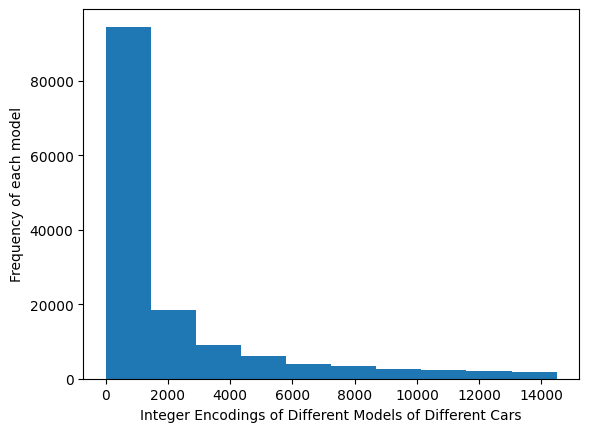

In [105]:
#Potting
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of each model")

We can we see that in the frequency distribution graph majority of the  majority of the area is occupied by models thatare from model0 to model2000

This tells us that out of 14000+ models majority of the data is covered roughly from model0 to model.

 for model there is 14000+ unique values which means
in one hot encoding it becomes 14000 + coloumns that means those many dimensions, that's a lot so we perfom binning.

binning is a technique in which we merge all the least frquent values and assign a single number to all of those types of models.

in this we take 70% of the most frequent which is about 700 and the rest will be 701!. say mjority is k and then the rest all with will be merge into one so it will be k+1. we will do one hot encoding of only the 70% that is only the 701 unique values not 14000.


 and then attach all the the tables of other nomial coloumn's hot encoded

like model 1 model 7001 paintcolor 1 paint color 2 to the this table adjacent to each other forming a huge table.


In [106]:
models_freq_dist = dict(data["model"].value_counts())

In [107]:
models_freq_dist[0]

188

In [193]:
area_cut_off = 0.70
top_models = list()
total_area = 0
total_frequency = data.shape[0]

for k,v in models_freq_dist.items():

  if (total_area/total_frequency) > area_cut_off:
    break

  top_models.append(k)

  total_area += models_freq_dist[k]

In [173]:
k = len(top_models)
print(k)

796


In [110]:
updated_mapping_dict = dict()

for i,item in enumerate(models_freq_dist.items()):

  if i <= (k-1):
    updated_mapping_dict[item[0]] = i
  else:
    updated_mapping_dict[item[0]] = k

In [111]:
data["model"].replace(to_replace=updated_mapping_dict.keys(), value=updated_mapping_dict.values(),inplace=True)

In [112]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,130,6,6,gas,128000.0,3,2,4,truck,black
1,27990,2012.0,gmc,165,3,8,gas,68696.0,2,3,4,pickup,black
2,34590,2016.0,chevrolet,66,3,6,gas,29499.0,2,3,4,pickup,silver
3,35000,2019.0,toyota,6,6,6,gas,43000.0,3,3,4,truck,grey
4,29990,2016.0,chevrolet,86,3,6,gas,17302.0,2,3,4,pickup,red


 773 top most frequently occurring models whose frequencies when summed up contribute to 70% of the area under the Frequency Distribution.

 Total there are 773 unique values

 Let's assign a unique integer value to each of the integer mappings till index 772 (k-1) and then merge all the minority and give 773 as the number

#**one hot encoding (For Nominal Categorical )**

--> **a way to encode nominal catogorical data** such that the comparison ends.



Categories as numbers: Machine learning models prefer to work with numbers. This method turns words or categories into something easier for the model to understand.
No ranking: If you used regular numbers (1 for Toyota, 2 for Ford), a model might think one brand is better than the other, which isn't true. One-hot encoding makes all categories equal.



there will be unique values with no rank or order between each other.

the values will be assigned values in serial order, the most frequent will get the first numbers and it goes on till the last catogorical nominal value gets a number and the range set to assign numbers will be done by giving shape of unique values in that column like for example model.


for example at first we will give ford as 0, gmc as 1 toyota as 2 etc but this is a nomial data which means it has  no rank so we need to make it in one order so no comparison is there this is called one hot encoding. we cannot give toyota as 2 and gmc as 1 as it represenyts some level we should stop this comparison. 1, 2 etc are just rankless numbers to identify a perticular string value we attach this number to a value like 010000 or 0000100 etc. In python it is in- built we just have to say that this is number say for example 1 is for ford and the 2 is for toyota it will just create a 0000100 number to represent it without a rank it'll do a loop until all of the repeating of the same value and do the same for say gmc or other type o unique values.



we **create an identity matrix** say four types of manufacturer then we create a four row identity matrix



 the first car will get the value
 first type(gmc)      : 1 0 0 0
 second type(bmw)     : 0 1 0 0
 third type(toyota)   : 0 0 1 0
 fourth type (ford)   : 0 0 0 1


 so each will form(1 lakh rows, x columns(based on the features of perticular attribute) example in model we saw before binning we got
 (1 lakh rows and 14000 columns)

then we will attach all the matrixes of every nominal columns together adjecent to each

 Now 1 is hot point 0 is cold point this is called hot one encoding.

In [113]:
 def convert_to_ohe_df(column_name):

  model_unique_values = data[column_name].unique().shape[0] # stores the number of unique values in model or manufacturer etc
  identity_matrix = np.eye(model_unique_values,model_unique_values)   #np.eye is used to ceate n identity matrix
  ohe_models = identity_matrix[data[column_name]]  # [identity matrix] [one column matrix with the label encoded model type ]
  df_column_names = [column_name+str(i) for i in range(model_unique_values)] # The output for this line will be ["model0", "model1", "model2",....]
  column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)

  return column_df




This process is repeated for every value in the column.

**`ohe_models = identity_matrix[data[column_name]]`**


This line performs the actual one-hot encoding:

It uses integer indexing on the identity matrix (identity_matrix). This means it treats the values in data[column_name] (e.g., "Toyota", "Ford", "Honda") as indices to extract rows from the matrix.


Each row in the resulting ohe_models array corresponds to a data point in the original column. Importantly, even if a value appears multiple times (e.g., "Ford", "Ford"), it will always use the same row of the identity matrix, effectively handling duplicates.


For each row in the original data:
The value is used as an index to retrieve the corresponding row from the identity_matrix.


If the value is "Toyota", it will index the first row (index 0) of the matrix: [1, 0, 0].
Example: Let's say your car_brand column looks like this:


car_brand
Toyota
Ford
Honda
Ford
The result of this line would be:



ohe_models = [[1, 0, 0],  # Toyota
             [0, 1, 0],  # Ford
             [0, 0, 1],  # Honda
             [0, 1, 0]]  # Ford
Each row represents a data point, and the columns correspond to the unique categories: Toyota, Ford, and Honda.


Crucially, even if a value like "A" appears multiple times in the column_name, it will always map to the same row (index 0) in the identity_matrix. This is because integer indexing relies on the position of the value, not its frequency.
Therefore, duplicate values in the original data are automatically captured in the one-hot encoding without requiring any additional processing or modification.

`column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)`

1. Creating a DataFrame:column_df = pd.DataFrame(...)
It uses the pd.DataFrame() function from the pandas library to construct the DataFrame.


2. Providing Data and Columns:

data=ohe_models: This argument specifies the data that will populate the DataFrame's cells. It uses the ohe_models variable, which contains the one-hot encoded representation of the original column.



columns=df_column_names: This argument defines the column names for the DataFrame, using the df_column_names list that was created earlier. This list holds names like "model0", "model1", etc., representing the encoded categories.

Example:

If ohe_models contained:

[[1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]
And df_column_names was:

["model0", "model1", "model2"]
The resulting column_df would be:

 model0  model1  model2
   1      0      0
   0      1      0
   0      0      1

In [114]:
for single_column in ["manufacturer","fuel","type","paint_color"]:

  column_unique_values = data[single_column].unique()
  data[single_column].replace(to_replace=column_unique_values,value=list(range(column_unique_values.shape[0])),inplace=True)

In [115]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,0,130,6,6,0,128000.0,3,2,4,0,0
1,27990,2012.0,1,165,3,8,0,68696.0,2,3,4,1,0
2,34590,2016.0,2,66,3,6,0,29499.0,2,3,4,1,1
3,35000,2019.0,3,6,6,6,0,43000.0,3,3,4,0,2
4,29990,2016.0,2,86,3,6,0,17302.0,2,3,4,1,3


In [116]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  column_df = convert_to_ohe_df(single_column)
  data.drop(labels=single_column,axis=1,inplace=True)
  data = pd.concat([data,column_df],axis=1)

In [117]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,2013.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,2012.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,2016.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,2019.0,6,6,43000.0,3,3,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,2016.0,3,6,17302.0,2,3,4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
data.to_csv("/content/updated_cleaned_vehicles.csv",index=False)

In [119]:
!cp /content/updated_cleaned_vehicles.csv /content/drive/MyDrive/

cp: failed to access '/content/drive/MyDrive/': Transport endpoint is not connected


In [120]:
!cp /content/drive/MyDrive/updated_cleaned_vehicles.csv /content/

cp: cannot stat '/content/drive/MyDrive/updated_cleaned_vehicles.csv': Transport endpoint is not connected


In [121]:
data = pd.read_csv("/content/updated_cleaned_vehicles.csv")

In [122]:
def apply_pca(X,preserved_variance_percentage):

  unprojected_X = np.array(X)
  X_cov = np.array(X.cov())
  Q_lambda_QT = np.linalg.svd(X_cov)
  total_variance = np.sum(Q_lambda_QT[1])
  variance_sum = 0
  num_eigen_vectors = 1

  if preserved_variance_percentage == 1:
    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0])
    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(X.shape[1])])
  else:
    for variance in Q_lambda_QT[1]:

      if (variance_sum/total_variance) > preserved_variance_percentage:
        break

      variance_sum += variance
      num_eigen_vectors += 1

    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0][:,0:num_eigen_vectors])

    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(num_eigen_vectors)])

  return projected_X

#**PCA is a compression algorithm**

MP3 is a compression alogorith,if we record human voice without compression for 5 minutes then it going tom occupy 15 GB.

PNG is a compression algorithm. if we click a picture 1024 x 768 resolution and we multiply by 3 because it is a rgb image red green blue. we can make any color with these three color and this is the only basic three colors in any picture.

an image is a 3D matrix. an image is 64 mega pixels that is 64 times 10 to the power 6 pixels, multiply it with 3 (rgb) 3 chanels.

the firts matrix is red behind it is green and behind green is blue.

now a single pixel in that 0-255 a number is there which represents the intensity of the pixel. if the pixel is in red matrix and the number of that pixel is 255 it means tha the pixel is 100% red highest peak of red.

there are 255 shades of red if the pixel of red  matrix has number 172 means the shade of red is 50% or something similar intensity.  And the space to store each number in a pixel is 8 bits/1 byte atleast. so for 64 mega pixel image the size of byte would be = 64 x 10^ 6 x 3 = the number of byte. that's about 192 MB. that's a lot of MB for a single picture so we need compression algorithm which will remove all the unnnessecry pixels that is negegible for naked eye when seen as a picture and only the majority of important pixels are taken which will get reduced to about 10MB.

like that in this line of code

projected_X = apply_pca(data.iloc[:,1:],0.99)

we are saying we only want 99% of it neglact the rest and pca is preforming this job

as soon as we performed 2 coloums got reduced which was 1%

this was done by PCA

In [194]:
projected_X = apply_pca(data.iloc[:,1:],0.999)

In [124]:
projected_X.head()

,feature_0,feature_1
0,127999.989389,-2012.166886
1,68695.989396,-2010.734654
2,29498.989375,-2014.577679
3,42999.989359,-2017.718203
4,17301.989376,-2014.510011


In [125]:
projected_X = (projected_X - projected_X.mean())/projected_X.std()

In [126]:
projected_data = pd.concat([projected_X,data["price"]],axis=1)

<Figure size 4000x4000 with 0 Axes>

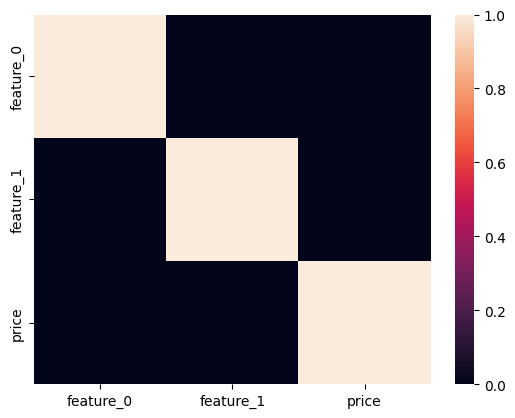

<Figure size 4000x4000 with 0 Axes>

In [127]:
sns.heatmap(projected_data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(40,40))

In [128]:
training_data_len = int(0.7 * projected_data.shape[0])
training_data = projected_data.iloc[0:training_data_len,:]

testing_data = projected_data.iloc[training_data_len:,:]

In [129]:
training_data.shape

(100811, 3)

In [130]:
testing_data.shape

(43206, 3)

In [131]:
training_data.head()

,feature_0,feature_1,price
0,0.071109,-0.354250,15000
1,-0.182435,-0.212221,27990
2,-0.350015,-0.593319,34590
3,-0.292294,-0.904753,35000
4,-0.402161,-0.586609,29990


In [132]:
X_train_transpose = np.array(training_data.iloc[:,0:projected_data.shape[1]-1])
y_train = np.array(training_data["price"]).reshape(-1,1)

X_test_transpose = np.array(testing_data.iloc[:,0:projected_data.shape[1]-1])
y_test = np.array(testing_data["price"]).reshape(-1,1)

In [133]:
X_train_transpose.shape

(100811, 2)

In [181]:
X_train_transpose

array([[ 0.07110874, -0.35424981],
       [-0.18243525, -0.21222073],
       [-0.35001523, -0.59331914],
       ...,
       [-0.04474835, -0.04863609],
       [-0.33023757, -0.8013104 ],
       [-0.4333841 ,  5.46730619]])

##The dataset has finally the following Input Features:

##$1.$ **```manufacturer3```** $(x_1)$
##$2.$ **```model30```** $(x_2)$
##$3.$ **```model31```** $(x_3)$




#The Input feature row vector of any $i^{th}$ row of the data in this case is given as:
#\begin{equation}
\vec{x}^i =
\begin{bmatrix}
x_1^i \cdots x_j^i \cdots x_{3}^i
\end{bmatrix}
\end{equation}




#Therefore,
#\begin{equation}
X_\text{train}^T =
\begin{bmatrix}
\longleftarrow \vec{x}^1 \longrightarrow \\
\vdots \\
x_1^i \cdots x_j^i \cdots x_{3}^i \\
\vdots \\
\longleftarrow \vec{x}^{N_\text{train}} \longrightarrow
\end{bmatrix}
\end{equation}


#And,
#\begin{equation}
\begin{bmatrix}
y_1 \\
\vdots \\
y_i \\
\vdots \\
y_{N_\text{train}}
\end{bmatrix}
\end{equation}



#Now, we will be **training a Linear Regression Model on our training data using Gradient Descent Algorithm** using the following update in a **while or for loop until this update rule converges to the Minima of the $MSE$, that is $(\theta_0^*, \vec{\theta}^*)$** also known as Loss Function:

#\begin{equation}
\theta_{final} = \theta_{initial} - \epsilon \cdot \frac{\partial MSE}{\partial \theta}
\end{equation}

#Where,
$\frac{\partial MSE}{\partial \theta_0}$

In [135]:
y_train.shape

(100811, 1)

In [136]:
N_train = y_train.shape[0]

In [137]:
def del_by_del_thetas(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  error_vector_transpose = np.transpose(y_pred - y_train)

  del_by_del_theta = (2/N_train)*np.transpose(np.matmul(error_vector_transpose,
                                                        X_train_transpose))
  del_by_del_theta_0 = (2/N_train)*np.sum(error_vector_transpose)

  return [del_by_del_theta_0,del_by_del_theta]

In [179]:
def mae(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  abs_error_vector = np.abs(y_pred - y_train)

  return np.mean(abs_error_vector)

In [209]:
epsilon = 1e-4
tol = 1e-3
# theta_0_initial = np.random.randn(1,)[0]
theta_0_initial = 0
theta_initial = np.zeros((X_train_transpose.shape[1],1))
iteration = 0

while iteration < 20000:

  initial_gradients = del_by_del_thetas(theta_0_initial,
                                        theta_initial)

  theta_0_final = theta_0_initial - (epsilon * initial_gradients[0])
  theta_final = theta_initial - (epsilon * initial_gradients[1])

  initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
                                           initial_gradients[1]))

  initial_mae = mae(theta_0_initial,theta_initial)
  final_mae = mae(theta_0_final,theta_final)

  if abs(initial_mae - final_mae) < tol:
    break

  initial_mae = mae(theta_0_initial,theta_initial)

  print("The Value of MAE at iteration # {} is {}".format(iteration,initial_mae))

  theta_0_initial = theta_0_final
  theta_initial = theta_final

  iteration += 1

The Value of MAE at iteration # 0 is 30877.16790826398
The Value of MAE at iteration # 1 is 30871.585295024164
The Value of MAE at iteration # 2 is 30866.02588544809
The Value of MAE at iteration # 3 is 30860.471727958968
The Value of MAE at iteration # 4 is 30854.92019168856
The Value of MAE at iteration # 5 is 30849.370980564232
The Value of MAE at iteration # 6 is 30843.82364191595
The Value of MAE at iteration # 7 is 30838.27785390894
The Value of MAE at iteration # 8 is 30832.733434632228
The Value of MAE at iteration # 9 is 30827.190587950892
The Value of MAE at iteration # 10 is 30821.649532228705
The Value of MAE at iteration # 11 is 30816.110036969516
The Value of MAE at iteration # 12 is 30810.57206767579
The Value of MAE at iteration # 13 is 30805.035504583953
The Value of MAE at iteration # 14 is 30799.500634951673
The Value of MAE at iteration # 15 is 30793.96812539006
The Value of MAE at iteration # 16 is 30788.437502163833
The Value of MAE at iteration # 17 is 30782.9089

```
epsilon = 1e-4  # Initial learning rate
tol = 1e-3  # Tolerance
theta_e_initial = 0
theta_initial = np.zeros((X_train_transpose.shape[1], 1))
iteration = 0
annealing_factor = 0.999999999999999  # Annealing factor for decreasing learning rate
lmbda = 0.999999999999999  # Regularization parameter

while iteration < 50000:  # Maximum iterations
    initial_gradients = del_by_del_thetas(theta_e_initial, theta_initial)
    epsilon *= annealing_factor  # Annealing the learning rate
    
    # Update the parameters with regularization
    theta_e_final = theta_e_initial - epsilon * (initial_gradients[0] + lmbda * theta_e_initial)
    theta_final = theta_initial - epsilon * (initial_gradients[1] + lmbda * theta_initial)

    initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
                                           initial_gradients[1]))
    
    initial_mae = mae(theta_e_initial, theta_initial)
    final_mae = mae(theta_e_final, theta_final)

    if abs(initial_mae - final_mae) < tol:
        break

    print("The Value of MAE at iteration # {} is {}".format(iteration, initial_mae))

    theta_e_initial = theta_e_final
    theta_initial = theta_final

    iteration += 1
  
  ```